In [1]:
import os
from ae_functions import get_folder_pickle_files
from load_data import *
import matplotlib.pyplot as plt
from ae_functions import *
from torch.utils.data import DataLoader

from acoustic_emission_dataset import AcousticEmissionDataset

In [10]:
# SIGNAL PROCESSING CONSTANTS
SIG_LEN = 1024           # [samples / signal] ;
DT = 10**-7              # [seconds] ; sample period / time between samples
LOW_PASS = 50*10**3      # [Hz] ; low frequency cutoff
HIGH_PASS = 800*10**3    # [Hz] ; high frequency cutoff
FFT_UNITS = 1000         # FFT outputs in Hz, this converts to kHz
NUM_BINS = 26            # For partial power

# ML HYPERPARAMETERS
EPOCHS = 3000            # training iterations
LEARNING_RATE = 1e-3     # step size for optimizer
BATCH_SIZE = 10          # for train and test loaders
ARCHITECTURE = 1
# NB: To vary autoencoder architecture, must do in class definition file

# FILE I/O
JSON_DATA_FILE = 'C:/Users/tul72/Desktop/phd/projects/pencil_lead_breaks/Data/PLB_data.json'

# Load AE data
ae_dataset = AcousticEmissionDataset(JSON_DATA_FILE,SIG_LEN,DT,LOW_PASS,
                                     HIGH_PASS,FFT_UNITS,NUM_BINS,0,0)
angles = ae_dataset.angles # what the one hot encoded targets map to
num_classes = len(angles)  # how many diff angles, for model output dim
example_feature_vec, _ = ae_dataset[0] # to determine feature dim
feature_dim = example_feature_vec.shape[0] # for model creation input dim

# Get specific angles in train and test set
train_angles = ['20deg','40deg']
test_angles = ['40deg']
train_data = ae_dataset._get_angle_subset(train_angles)
test_data = ae_dataset._get_angle_subset(test_angles)

test_data_loader = DataLoader(test_data)
train_data_loader = DataLoader(train_data, batch_size=BATCH_SIZE,
                               shuffle=True) # shuffles training data
    
pth_path = './experiment_01/nn01_500_0.001_adam_mse.pth'
model_num = 2
feature_dim = 1024
model = load_model(pth_path, model_num, feature_dim)


Shape of waves is: torch.Size([847, 1024])
Datatype of waves is: torch.float32
waves requires grad: False
Shape of targets is: torch.Size([847, 5])
Datatype of targets is: torch.float32
targets requires grad: False

NeuralNetwork_02(
  (layers): Sequential(
    (0): Linear(in_features=1024, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=1, bias=True)
  )
)


In [11]:
model.eval()
with torch.no_grad():
    test_predicted = []
    test_actual = []
    total_examples = 0
    #total_correct = 0
    for inputs, targets in test_data_loader:
        prediction = model(inputs) # Tensor (1,3) -> ex. [0.1, 0.01,0.6]
        test_predicted.append(prediction.numpy())
        
test_predicted = np.array(test_predicted)
test_predicted = test_predicted.flatten()

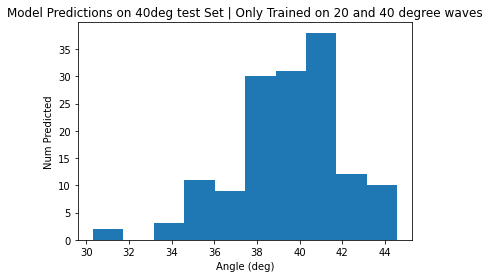

In [12]:
plt.hist(test_predicted)
plt.ylabel('Num Predicted')
plt.xlabel('Angle (deg)')
plt.title(f'Model Predictions on {test_angles[0]} test Set | Only Trained on 20 and 40 degree waves')
plt.show()